In [1]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os,cv2
import pickle
import random
from hashlib import md5

from PIL import Image
import torch
from torchvision import transforms

In [2]:
# Define paths
data_path = "faces_emotions_data"

# Define class labels
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', "Surprise"]

In [3]:
# Helper function to load images, label them, and save to pickle files
def load_label_and_pickle_images(data_path, class_labels, output_file):
    img_data_list = []
    img_labels_list = []

    for label in class_labels:
        img_dir = os.path.join(data_path, label)
        img_list = os.listdir(img_dir)
        print(f'The images of the dataset {label} were loaded successfully\n')

        for img in img_list:
            img_path = os.path.join(img_dir, img)
            input_img = cv2.imread(img_path)

            if input_img is None:
                print(f'Failed to load image: {img_path}')
                continue

            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize = cv2.resize(input_img, (48, 48))
            img_data_list.append(input_img_resize)
            img_labels_list.append(label)

    # Convert to numpy array and normalize
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data / 255.0

    # Convert labels to numpy array
    img_labels = np.array(img_labels_list)

    # Save images and labels to a pickle file
    with open(output_file, 'wb') as f:
        pickle.dump((img_data, img_labels), f)

    print(f'{output_file} has been saved with shape {img_data.shape} and labels shape {img_labels.shape}')

In [4]:
#Execute Function
output_file = 'images_labels.pkl'
load_label_and_pickle_images(data_path, class_labels, output_file)

The images of the dataset Anger were loaded successfully

The images of the dataset Contempt were loaded successfully

The images of the dataset Disgust were loaded successfully

The images of the dataset Fear were loaded successfully

The images of the dataset Happiness were loaded successfully

The images of the dataset Neutral were loaded successfully

The images of the dataset Sadness were loaded successfully

The images of the dataset Surprise were loaded successfully

images_labels.pkl has been saved with shape (5558, 48, 48) and labels shape (5558,)


In [5]:
# Function to load images, label them, and save to pickle files
def load_label_and_pickle_images(data_path, class_labels):
    img_data_list = []
    img_labels_list = []

    img_hash_dict = {}  # To keep track of image hashes across all folders

    for label in class_labels:
        img_dir = os.path.join(data_path, label)
        img_list = os.listdir(img_dir)
        print(f'The images of the dataset {label} were loaded successfully\n')

        for img in img_list:
            img_path = os.path.join(img_dir, img)

            input_img = cv2.imread(img_path)

            if input_img is None:
                print(f'Failed to load image: {img_path}')
                continue

            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize = cv2.resize(input_img, (48, 48))

            # Compute hash of the image
            img_hash = md5(input_img_resize).hexdigest()

            if img_hash in img_hash_dict:
                print(f'Removing duplicate image: {img_path} (duplicate of {img_hash_dict[img_hash]})')
                continue  # Skip adding this duplicate image
            else:
                img_hash_dict[img_hash] = img_path

            img_data_list.append(input_img_resize)
            img_labels_list.append(label)

    # Convert to numpy array and normalize
    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    img_data = img_data / 255.0

    # Convert labels to numpy array
    img_labels = np.array(img_labels_list)

    # Save images and labels to a pickle file
    with open('images_labels_no_duplicates.pkl', 'wb') as f:
        pickle.dump((img_data, img_labels), f)

    print(f'images_labels_no_duplicates.pkl has been saved with shape {img_data.shape} and labels shape {img_labels.shape}')

# Execute the function
data_path = "faces_emotions_data"
class_labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
load_label_and_pickle_images(data_path, class_labels)

The images of the dataset Anger were loaded successfully

Removing duplicate image: faces_emotions_data\Anger\images - 2020-11-06T003628.925_face.png (duplicate of faces_emotions_data\Anger\9k__face.png)
Removing duplicate image: faces_emotions_data\Anger\images - 2020-11-06T004032.118_face.png (duplicate of faces_emotions_data\Anger\images - 2020-11-06T003550.427_face.png)
Removing duplicate image: faces_emotions_data\Anger\images - 2020-11-06T004037.943_face.png (duplicate of faces_emotions_data\Anger\images - 2020-11-06T003708.842_face.png)
Removing duplicate image: faces_emotions_data\Anger\images - 2020-11-06T004045.846_face.png (duplicate of faces_emotions_data\Anger\images - 2020-11-06T003720.067_face.png)
Removing duplicate image: faces_emotions_data\Anger\images - 2020-11-06T004110.233_face.png (duplicate of faces_emotions_data\Anger\images - 2020-11-06T003744.820_face.png)
Removing duplicate image: faces_emotions_data\Anger\images - 2020-11-06T004129.030_face.png (duplicate o

In [6]:
# Helper function to load the pickled data and verify the images
def verify_images(dataset_file):
    with open(dataset_file, 'rb') as f:
        img_data, img_labels = pickle.load(f)

    # Randomly pick and plot one image from each class
    plt.figure(figsize=(16, 8))

    unique_labels = np.unique(img_labels)
    for idx, label in enumerate(unique_labels):
        # Get all images for the current label
        label_images = img_data[img_labels == label]

        # Randomly select one image
        random_image = random.choice(label_images)

        plt.subplot(2, 4, idx + 1)
        plt.imshow(random_image, cmap='gray')
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

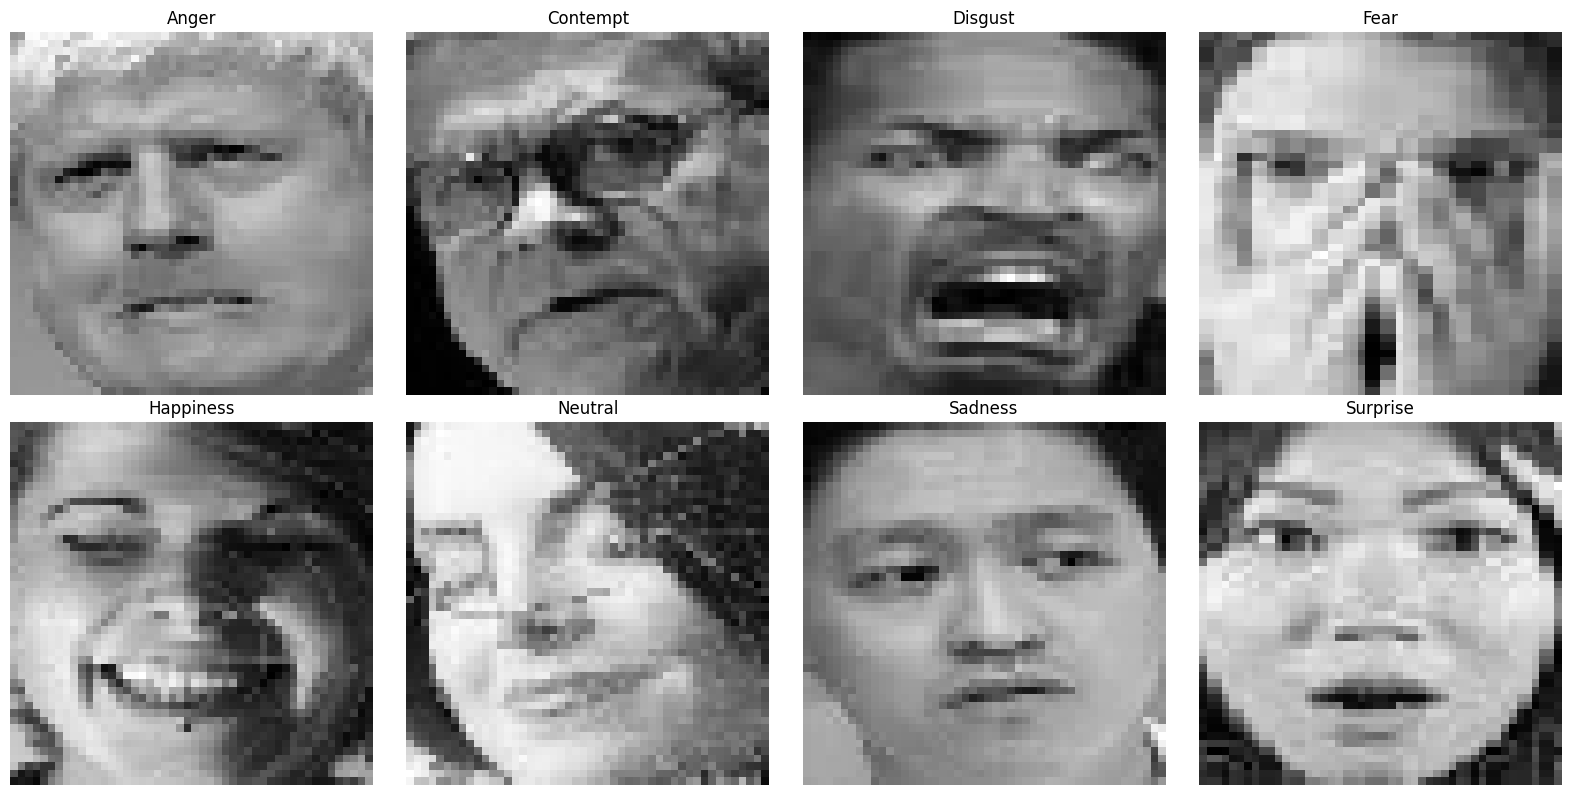

In [7]:
# Specify the input dataset file
dataset_file = 'images_labels.pkl'

# Execute the verification function
verify_images(dataset_file)

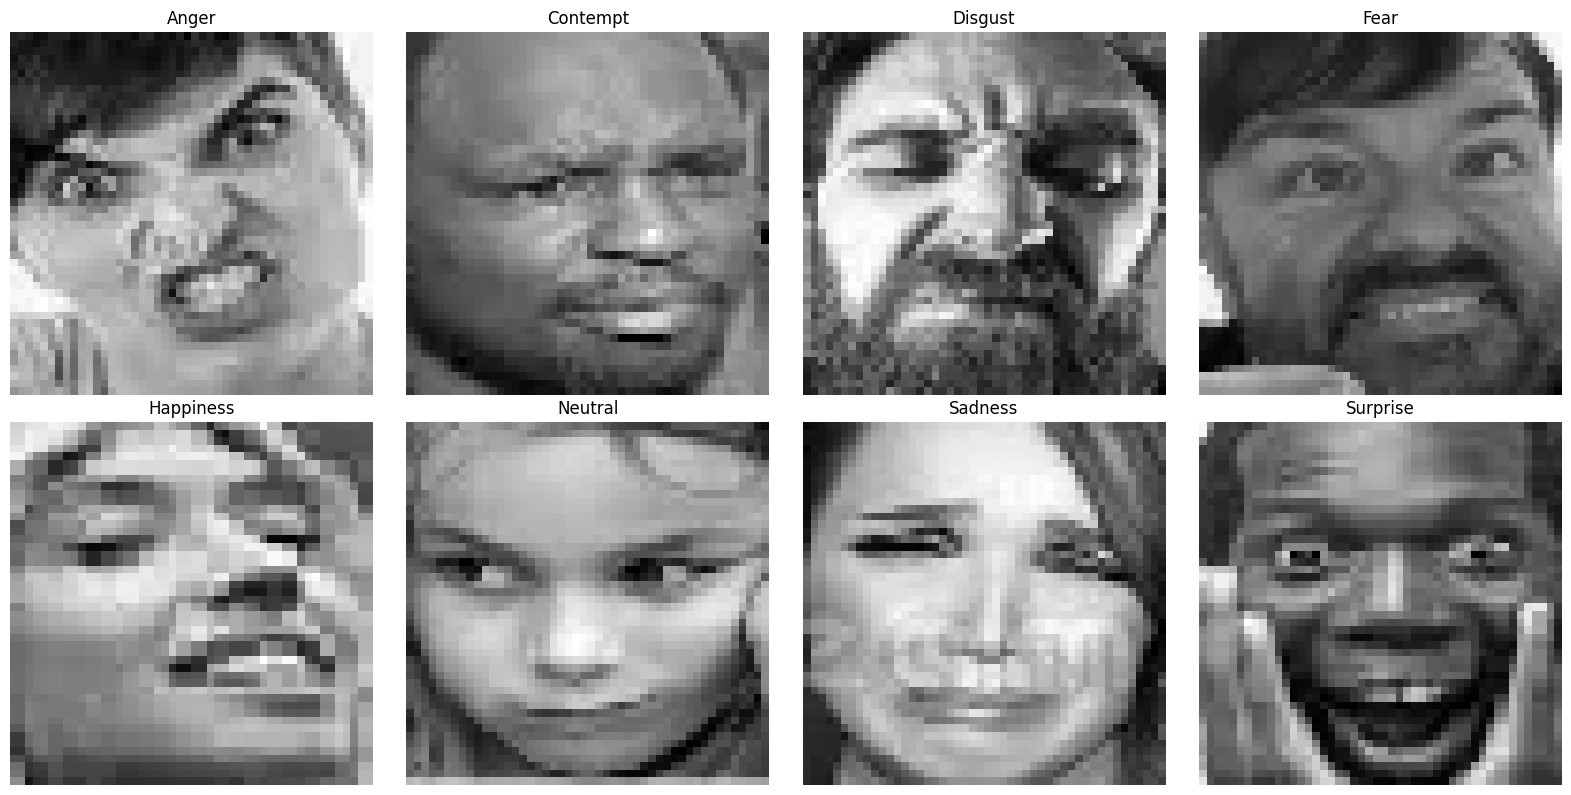

In [8]:
# Specify the input dataset file
dataset_file = 'images_labels_no_duplicates.pkl'

# Execute the verification function
verify_images(dataset_file)

In [9]:
#Helper function to cont and plot the items for each label
def count_items_in_classes(dataset_file):
    # Load the pickled data
    with open(dataset_file, 'rb') as f:
        img_data, img_labels = pickle.load(f)

    # Count the occurrences of each label
    unique_labels, counts = np.unique(img_labels, return_counts=True)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(unique_labels, counts, color='skyblue')
    plt.xlabel('Emotion')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Emotion Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

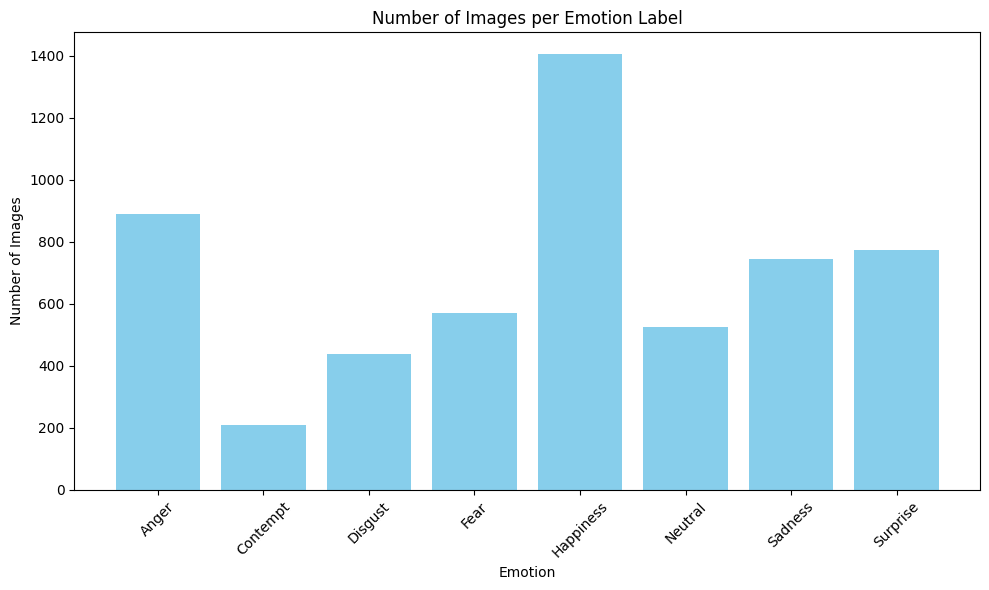

In [10]:
# Specify the input dataset file
dataset_file = 'images_labels.pkl'

# Execute the verification function
count_items_in_classes(dataset_file)

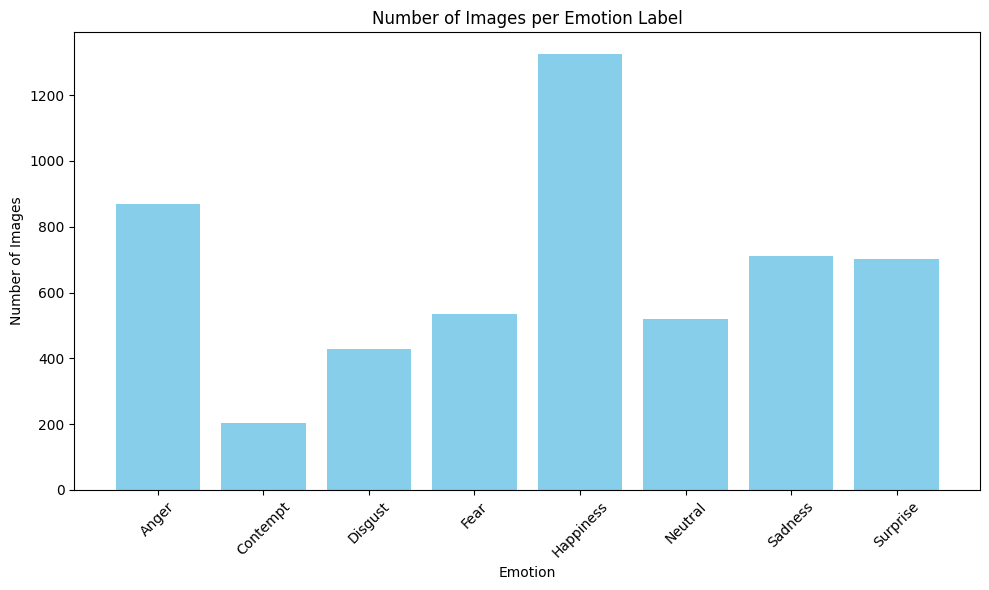

In [11]:
# Specify the input dataset file
dataset_file = 'images_labels_no_duplicates.pkl'

# Execute the verification function
count_items_in_classes(dataset_file)

In [12]:
# Define the data augmentation transforms
data_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(48, scale=(0.8, 1.0)),
    #transforms.ColorJitter(contrast=0.1, saturation=0.1, brightness=0.1, hue=0.1), #we remove colorjitter because it can impair the display of microexpressions
])

def augment_images(img_data, target_count, label):
    augmented_images = []
    while len(augmented_images) + len(img_data) < target_count:
        for img in img_data:
            if len(augmented_images) + len(img_data) >= target_count:
                break
            img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Convert to PIL image
            augmented_img = data_transforms(img_pil)  # Apply transforms
            augmented_img = np.array(augmented_img).astype('float32') / 255.0  # Normalize back to 0-1 range
            augmented_images.append(augmented_img)
        print(f'{label}: {len(augmented_images)} augmented images generated so far')
    return np.array(augmented_images)

def balance_dataset(input_pickle_file, output_pickle_file):
    # Load the data from the pickle file
    with open(input_pickle_file, 'rb') as f:
        img_data, img_labels = pickle.load(f)

    # Combine images and labels into a dictionary
    img_data_dict = {label: [] for label in set(img_labels)}
    for img, label in zip(img_data, img_labels):
        img_data_dict[label].append(img)

    # Find the maximum class size
    max_class_size = max(len(img_list) for img_list in img_data_dict.values())

    # Balance the dataset
    balanced_img_data_dict = {}

    for label, img_list in img_data_dict.items():
        img_list = np.array(img_list).astype('float32')
        print(f'Processing {label}, {len(img_list)} images')
        if len(img_list) < max_class_size:
            augmented_imgs = augment_images(img_list, max_class_size, label)
            balanced_img_data_dict[label] = np.concatenate((img_list, augmented_imgs), axis=0)
        else:
            balanced_img_data_dict[label] = img_list

        with open(f'{label}_balanced_images.pkl', 'wb') as f:
            pickle.dump(balanced_img_data_dict[label], f)
        print(f'{label}_balanced_images.pkl has been saved with shape {balanced_img_data_dict[label].shape}')

    # Save the entire balanced dataset into a single pickle file
    with open(output_pickle_file, 'wb') as f:
        pickle.dump(balanced_img_data_dict, f)
    print(f'{output_pickle_file} has been saved')

In [13]:
input_pickle_file = 'images_labels_no_duplicates.pkl'
output_pickle_file = 'balanced_images_labels.pkl'
balance_dataset(input_pickle_file, output_pickle_file)

Processing Surprise, 702 images
Surprise: 623 augmented images generated so far
Surprise_balanced_images.pkl has been saved with shape (1325, 48, 48)
Processing Anger, 868 images
Anger: 457 augmented images generated so far
Anger_balanced_images.pkl has been saved with shape (1325, 48, 48)
Processing Disgust, 428 images
Disgust: 428 augmented images generated so far
Disgust: 856 augmented images generated so far
Disgust: 897 augmented images generated so far
Disgust_balanced_images.pkl has been saved with shape (1325, 48, 48)
Processing Contempt, 203 images
Contempt: 203 augmented images generated so far
Contempt: 406 augmented images generated so far
Contempt: 609 augmented images generated so far
Contempt: 812 augmented images generated so far
Contempt: 1015 augmented images generated so far
Contempt: 1122 augmented images generated so far
Contempt_balanced_images.pkl has been saved with shape (1325, 48, 48)
Processing Sadness, 711 images
Sadness: 614 augmented images generated so fa

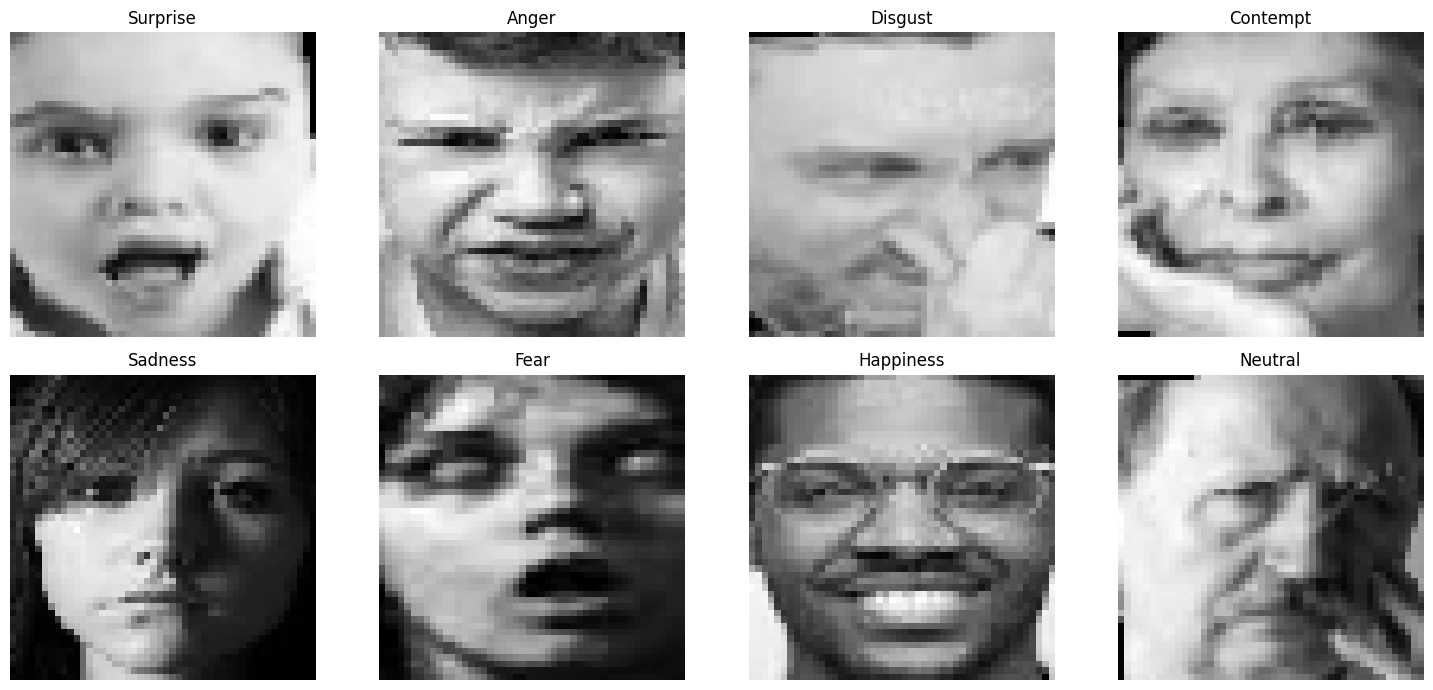

In [14]:
# Visualize a few samples to ensure the data augmentation worked correctly
with open(output_pickle_file, 'rb') as f:
    balanced_img_data_dict = pickle.load(f)

fig, axs = plt.subplots(2, 4, figsize=(15, 7))
for i, label in enumerate(balanced_img_data_dict.keys()):
    img_data = balanced_img_data_dict[label]
    img_idx = random.randint(0, len(img_data) - 1)
    img = img_data[img_idx]
    ax = axs[i // 4, i % 4]
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
def count_items_in_classes_2(dataset_file):
    # Load the pickled data
    with open(dataset_file, 'rb') as f:
        balanced_img_data_dict = pickle.load(f)

    # Count the number of items in each class
    for label, img_list in balanced_img_data_dict.items():
        print(f'{label}: {len(img_list)} images')

In [16]:
# Specify the input dataset file
dataset_file = 'balanced_images_labels.pkl'

# Execute the verification function
count_items_in_classes_2(dataset_file)

Surprise: 1325 images
Anger: 1325 images
Disgust: 1325 images
Contempt: 1325 images
Sadness: 1325 images
Fear: 1325 images
Happiness: 1325 images
Neutral: 1325 images


In [17]:
# Load the data from the pickle file
with open('images_labels_no_duplicates.pkl', 'rb') as f:
    img_data, img_labels = pickle.load(f)

# Print out some basic information about the data
print(f'Loaded data shape: {img_data.shape}')
print(f'Loaded labels shape: {img_labels.shape}')
print(f'Unique labels: {set(img_labels)}')

Loaded data shape: (5289, 48, 48)
Loaded labels shape: (5289,)
Unique labels: {'Surprise', 'Anger', 'Disgust', 'Contempt', 'Sadness', 'Fear', 'Happiness', 'Neutral'}


In [18]:
def inspect_balanced_dataset(file_path):
    # Load the balanced dataset
    with open(file_path, 'rb') as f:
        balanced_img_data_dict = pickle.load(f)

    # Initialize lists to collect all images and labels
    all_images = []
    all_labels = []

    # Iterate through the dictionary to collect data
    for label, img_list in balanced_img_data_dict.items():
        all_images.extend(img_list)
        all_labels.extend([label] * len(img_list))

    # Convert lists to numpy arrays
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # Print the required information
    print(f'Loaded data shape: {all_images.shape}')
    print(f'Loaded labels shape: {all_labels.shape}')
    print(f'Unique labels: {set(all_labels)}')

# Specify the input dataset file
dataset_file = 'balanced_images_labels.pkl'

# Execute the inspection function
inspect_balanced_dataset(dataset_file)

Loaded data shape: (10600, 48, 48)
Loaded labels shape: (10600,)
Unique labels: {'Surprise', 'Anger', 'Disgust', 'Contempt', 'Sadness', 'Fear', 'Happiness', 'Neutral'}
